In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# import libraries

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import History 
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

history = History()

In [0]:
# batch, classes, epochs

batch_size = 32
num_classes = 10
epochs = 50

In [23]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape: ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


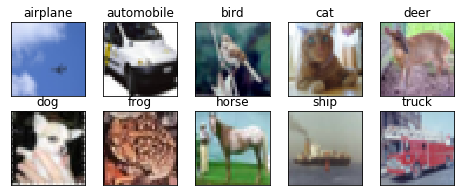

In [24]:
# plotting some random 10 images

class_names = ['airplane',
               'automobile',
               'bird',
               'cat',
               'deer',
               'dog',
               'frog',
               'horse',
               'ship',
               'truck']
               
fig = plt.figure(figsize=(8, 3))
for i in range(num_classes):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  idx = np.where(y_train[:] == i)[0]
  feature_idx = x_train[idx, ::]
  img_num = np.random.randint(feature_idx.shape[0])
  im = (feature_idx[img_num, ::])
  ax.set_title(class_names[i])
  plt.imshow(im)
plt.show()

In [0]:
# Convert class vectors to binary class metrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes) 

In [0]:
# model architecture
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [27]:
#summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 64)       

In [0]:
# compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

# convert to float, normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [29]:
# train
model.fit(x_train, y_train, 
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          callbacks=[history])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 412us/step - loss: 8.5119 - acc: 0.4283 - val_loss: 6.5094 - val_acc: 0.4722
Epoch 2/50
50000/50000 [==============================] - 20s 393us/step - loss: 4.9443 - acc: 0.5718 - val_loss: 3.7578 - val_acc: 0.6356
Epoch 3/50
50000/50000 [==============================] - 19s 385us/step - loss: 3.0747 - acc: 0.6470 - val_loss: 2.7926 - val_acc: 0.5707
Epoch 4/50
50000/50000 [==============================] - 19s 386us/step - loss: 2.0658 - acc: 0.6940 - val_loss: 1.7627 - val_acc: 0.7038
Epoch 5/50
50000/50000 [==============================] - 19s 380us/step - loss: 1.5172 - acc: 0.7245 - val_loss: 1.3205 - val_acc: 0.7444
Epoch 6/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.2213 - acc: 0.7426 - val_loss: 1.1333 - val_acc: 0.7512
Epoch 7/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.0534 - acc: 0.7635 - val_loss: 1.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


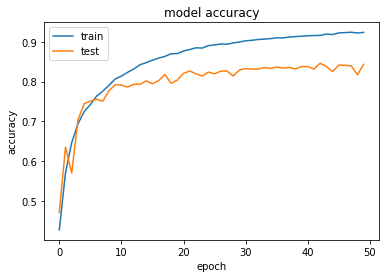

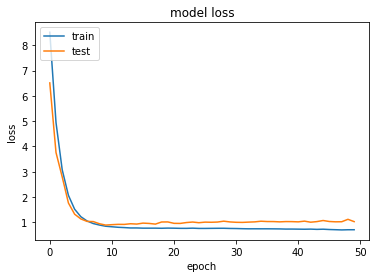

In [30]:
# list all data in history

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss' ])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Result : After 50 epochs, the difference between training and validation accuracy is low but the training is slow as compared to the model with batch normalization.  